In [45]:
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import pandas as pd

In [47]:
bench_pattern = re.compile(r"\[(?>BENCH|BECNH)\],?\s+(\w+):\s+(\d+)")
instructions_pattern = re.compile(r"^\s+(\d+) instructions$")
complexity = re.compile(r"^Pre-SSA\|Complexity: (\d+)$")
maxmem = re.compile(r"\[MAXMEM\] (\d+)")

def parse_file(filepath):
    print(filepath)

    start_time = 0
    instr_pre_slice_count = 0
    instr_count = 0


    with open(filepath, "r") as file:
        fullcontent = ''.join(file.readlines())
        if (len(fullcontent.split("[BENCH], Run")) < 2):
            return None
        content_first = fullcontent.split("[BENCH], Run")[0]
        # Parse key-value pairs from the block
        parsed = {}
        parsed['name'] = filepath

        # Match "key size: value"
        for match in re.finditer(r'(\w+)\s+size:\s+(\d+)', content_first):
            key, value = match.groups()
            parsed[key] = int(value)

        # Match "X Blocks: value"
        for match in re.finditer(r'([\w]+)\sBlocks:\s+(\d+)', content_first):
            key, value = match.groups()
            key = key.strip().lower().replace(" ", "_") + "_blocks"
            parsed[key] = int(value)

        content = fullcontent.split("[BENCH], Run")[1]

        # Match "key size: value"
        for match in re.finditer(r'(\w+)\s+size:\s+(\d+)', content):
            key, value = match.groups()
            if key in ['aloc_val']:
                parsed["post" + key] = int(value)

        ## Match "X Blocks: value"
        #for match in re.finditer(r'([\w]+)\sBlocks:\s+(\d+)', content):
        #    key, value = match.groups()
        #    key = key.strip().lower().replace(" ", "_") + "_blocks"
        #    parsed["post" + key] = int(value)
    with open(filepath, "r") as file:
        for line in file:
            match = complexity.search(line)
            if match:
                parsed['complexity'] = int(match.group(1))
            match = maxmem.search(line)
            if match:
                parsed["mem"] = int(match.group(1)) / 1073741824
                print("match mem", int(match.group(1)))
            match = bench_pattern.search(line)
            if match:
                name = match.group(1)
                if name == "Start":
                    start_time = int(match.group(2))
            match = instructions_pattern.search(line)
            if match:
                if instr_pre_slice_count == 0:
                    instr_pre_slice_count = match.group(1)
                    parsed['instr_pre_slice_count'] = int(instr_pre_slice_count)
                else:
                    instr_count = match.group(1)
    with open(filepath, "r") as file:
        for line in file:
            match = bench_pattern.search(line)
            if match:
                name = match.group(1)
                timestamp = int(match.group(2))
                #data[name].append((int(instr_count), (timestamp - start_time)/ 1000))
                parsed['runtime'] = (timestamp - start_time)/ 1000 / 60
    return parsed

In [15]:
## Program slicing analysis

directory = "program_slicing"
parsed_data = []
i = 1
for filename in os.listdir(directory):
    print(f"{i}/{len(os.listdir(directory))}")
    filepath = os.path.join(directory, filename)
    i += 1
    if output := parse_file(filepath):
        print(output)
        parsed_data.append(output)

df = pd.DataFrame(parsed_data)
latex_table = df[['name', 'assign_reg', 'base_reg', 'runtime', 'mem']].to_latex(float_format="{:.2f}".format)
print(latex_table)

1/4
program_slicing/cflow_O2_gcc_without_slicing.txt
match mem 49511931904
{'name': 'program_slicing/cflow_O2_gcc_without_slicing.txt', 'aloc_val': 5377, 'assign': 0, 'assign_mloc': 372, 'assign_reg': 19869, 'assing_deref_reg': 3716, 'atfunc_to_block': 315, 'base_reg': 362984, 'block_to_func': 6560, 'block_with_return_of_at_function': 538, 'func_call_targets': 0, 'phi': 788421, 'reg_to_block': 961078, 'stack_registers': 13120, 'undeterministic_assign': 0, 'used_func_call': 56, 'global_blocks': 1, 'heap_blocks': 48, 'stack_blocks': 1151, 'postaloc_val': 217061290, 'complexity': 5932, 'instr_pre_slice_count': 628824, 'mem': 46.11157989501953, 'runtime': 191.25598333333335}
2/4
program_slicing/cflow_O2_gcc_without_both.txt
match mem 6150328320
{'name': 'program_slicing/cflow_O2_gcc_without_both.txt', 'aloc_val': 5377, 'assign': 0, 'assign_mloc': 372, 'assign_reg': 28560, 'assing_deref_reg': 3716, 'atfunc_to_block': 315, 'base_reg': 618961, 'block_to_func': 6560, 'block_with_return_of_at_f

In [49]:
directory = "cwe_results"
parsed_data = []
i = 1
for filename in os.listdir(directory):
    print(f"{i}/{len(os.listdir(directory))}")
    filepath = os.path.join(directory, filename)
    i += 1
    if output := parse_file(filepath):
        print(output)
        parsed_data.append(output)

df = pd.DataFrame(parsed_data)

1/72
cwe_results/infotocap_gcc_O1.txt
match mem 24217399296
{'name': 'cwe_results/infotocap_gcc_O1.txt', 'aloc_val': 7183, 'assign': 0, 'assign_mloc': 638, 'assign_reg': 17233, 'assing_deref_reg': 4362, 'atfunc_to_block': 321, 'base_reg': 79310, 'block_to_func': 9043, 'block_with_return_of_at_function': 547, 'func_call_targets': 0, 'phi': 206797, 'reg_to_block': 1112012, 'stack_registers': 18086, 'undeterministic_assign': 0, 'used_func_call': 26, 'global_blocks': 1, 'heap_blocks': 48, 'stack_blocks': 1120, 'postaloc_val': 67663675, 'complexity': 8792, 'instr_pre_slice_count': 1069351, 'mem': 22.554210662841797, 'runtime': 35.9929}
2/72
cwe_results/cflow_clang_O1.txt
match mem 13514043392
{'name': 'cwe_results/cflow_clang_O1.txt', 'aloc_val': 3922, 'assign': 0, 'assign_mloc': 321, 'assign_reg': 12748, 'assing_deref_reg': 3691, 'atfunc_to_block': 412, 'base_reg': 57160, 'block_to_func': 6269, 'block_with_return_of_at_function': 532, 'func_call_targets': 0, 'phi': 129371, 'reg_to_block': 

In [50]:
print(df.loc[66])

name                                cwe_results/cflow_gcc_O1.txt
aloc_val                                                    2681
assign                                                         0
assign_mloc                                                  366
assign_reg                                                 13639
assing_deref_reg                                            3697
atfunc_to_block                                              322
base_reg                                                   59776
block_to_func                                               6488
block_with_return_of_at_function                             452
func_call_targets                                              0
phi                                                       140447
reg_to_block                                              748775
stack_registers                                            12976
undeterministic_assign                                         0
used_func_call           

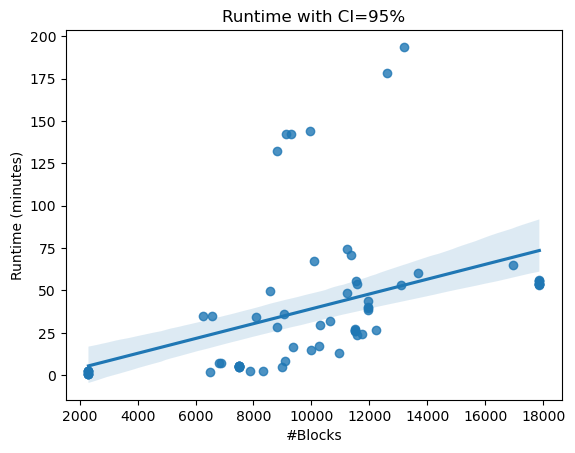

In [69]:
subset = df
sns.regplot(data=subset, x='block_to_func', y='runtime', ci=95, marker='o')
"""
for i in range(len(subset)):
    plt.annotate(df['name'][i], (df['block_to_func'][i], df['runtime'][i]),
                 textcoords="offset points", xytext=(5,5), ha='left', fontsize=5)
"""
plt.title('Runtime with CI=95%')
plt.xlabel('#Blocks')
plt.ylabel('Runtime (minutes)')
plt.savefig('output/runtime.pdf', format='pdf')
plt.show()

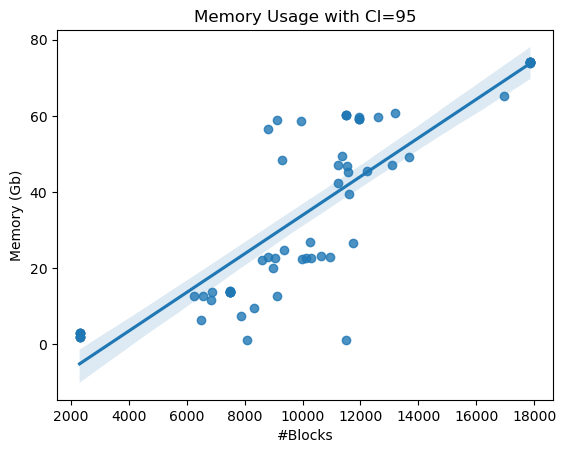

In [70]:
subset = df
sns.regplot(data=subset, x='block_to_func', y='mem', ci=95, marker='o')
"""
for i in range(len(subset)):
    plt.annotate(df['name'][i], (df['block_to_func'][i], df['runtime'][i]),
                 textcoords="offset points", xytext=(5,5), ha='left', fontsize=5)
"""
plt.title('Memory Usage with CI=95')
plt.xlabel('#Blocks')
plt.ylabel('Memory (Gb)')
plt.savefig('output/memusage.pdf', format='pdf')
plt.show()

In [46]:
import json
def extract_indirect_calls(file_path):
    indirect_map = defaultdict(set)

    with open(file_path, 'r') as f:
        for line in f:
            try:
                data = json.loads(line).get("calls")
                for call in data:
                    if call.get("is_indirect") == True:
                        from_instr = call.get("from_instr")
                        to_instr = call.get("to_instr")
                        if from_instr is not None and to_instr is not None:
                            indirect_map[from_instr].add(to_instr)

            except Exception as e:
                pass
                #print(f"Skipping invalid JSON line: {line.strip()}\nError: {e}")

    call_count = 0
    targets_count = 0
    for indirect_call in indirect_map:
        call_count += 1
        #print(indirect_call)
        #print(indirect_map[indirect_call])
        targets_count += len(indirect_map[indirect_call])
    if call_count == 0:
        print("ZERO")
        return
    print("",filename, targets_count / call_count)
    return targets_count / call_count

directory = "../soundness-testing-valgrind/cwe_output"
parsed_data = []
for filename in os.listdir(directory):
    data = {}
    data['bin_name'], data['compiler'], data['opt'] = filename.replace('.txt', '').split("_")
    data['AICT'] = extract_indirect_calls(f"{directory}/{filename}")
    parsed_data.append(data)

directory = "../soundness-testing-valgrind/cwe_results_without_phi_rule/"
for filename in os.listdir(directory):
    data = {}
    for data in parsed_data:
        bin_name, compiler, opt = filename.replace('.txt', '').split("_")
        if data['bin_name'] == bin_name and data['compiler'] == compiler and data['opt'] == opt:            
            data['WITHOUT_AICT'] = extract_indirect_calls(f"{directory}/{filename}")


directory = "precision"
for filename in os.listdir(directory):
    data = {}
    if 'memcached' in filename:
        data['bin_name'], data['compiler'], data['opt'] = "memcached", "gcc", "O2"
    elif 'lighhtpd' in filename:
            data['bin_name'], data['compiler'], data['opt'] = "lighttpd", "gcc", "O2"
    data['AICT'] = extract_indirect_calls(f"{directory}/{filename}")
    parsed_data.append(data)


df = pd.DataFrame(parsed_data)
df_sorted = df.sort_values(by='bin_name')
pivot = df[df['opt'] == 'O2'].pivot_table(values="AICT", columns=['bin_name', 'compiler'], aggfunc='first')
latex_table = pivot.T.to_latex(float_format="{:.2f}".format)
df[df['WITHOUT_AICT'] == df['WITHOUT_AICT']]

 mujs_clang_O1.txt 176.0
 imginfo_clang_O3.txt 28.0
 jhead_clang_O1.txt 47.0
 flvmeta_clang_O3.txt 37.0
 cflow_clang_O3.txt 18.507614213197968
 jq_clang_O2.txt 421.0
 flvmeta_clang_O1.txt 37.0
 cflow_clang_O1.txt 19.823529411764707
 infotocap_gcc_O0.txt 11.952380952380953
 jhead_gcc_O3.txt 51.0
 jhead_gcc_O1.txt 51.0
 mujs_gcc_O1.txt 185.0
 gdk-pixbuf-pixdata_gcc_O3.txt 408.43697478991595
 flvmeta_gcc_O3.txt 37.0
 jhead_gcc_O0.txt 51.0
 wav2swf_clang_O3.txt 462.0
 gdk-pixbuf-pixdata_gcc_O1.txt 131.98230088495575
 cflow_clang_O0.txt 25.408163265306122
 flvmeta_gcc_O2.txt 37.0
 jhead_gcc_O2.txt 51.0
 flvmeta_gcc_O1.txt 37.0
 imginfo_gcc_O1.txt 28.0
 flvmeta_clang_O0.txt 37.0
 infotocap_clang_O0.txt 8.333333333333334
ZERO
 infotocap_clang_O2.txt 261.0
 mujs_gcc_O0.txt 185.0
 cflow_gcc_O2.txt 294.0
 imginfo_clang_O0.txt 28.0
 jhead_clang_O2.txt 47.0
 imginfo_clang_O2.txt 28.0
ZERO
 imginfo_clang_O1.txt 28.0
 gdk-pixbuf-pixdata_clang_O3.txt 185.48979591836735
 jq_gcc_O3.txt 437.0
 cflow_cla

,bin_name,compiler,opt,AICT,WITHOUT_AICT
4,cflow,clang,O3,18.507614,18.436170
7,cflow,clang,O1,19.823529,20.114286
17,cflow,clang,O0,25.408163,25.408163
27,cflow,gcc,O2,294.000000,294.000000
34,jq,gcc,O3,437.000000,437.000000
35,cflow,clang,O2,18.500000,18.427807
45,jq,gcc,O1,486.000000,486.000000
48,cflow,gcc,O0,28.224490,28.224490
49,jq,gcc,O0,10.100000,10.100000
63,jq,clang,O0,6.800000,6.800000
